In [17]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df=pd.read_csv(r'C:\Users\ayesha.amjad\Desktop\Self Learning\DataScienceCourse\Datasets for Analysis\NetflixData.csv', encoding = "ISO-8859-1")
print(df.shape)

(6234, 12)


In [18]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


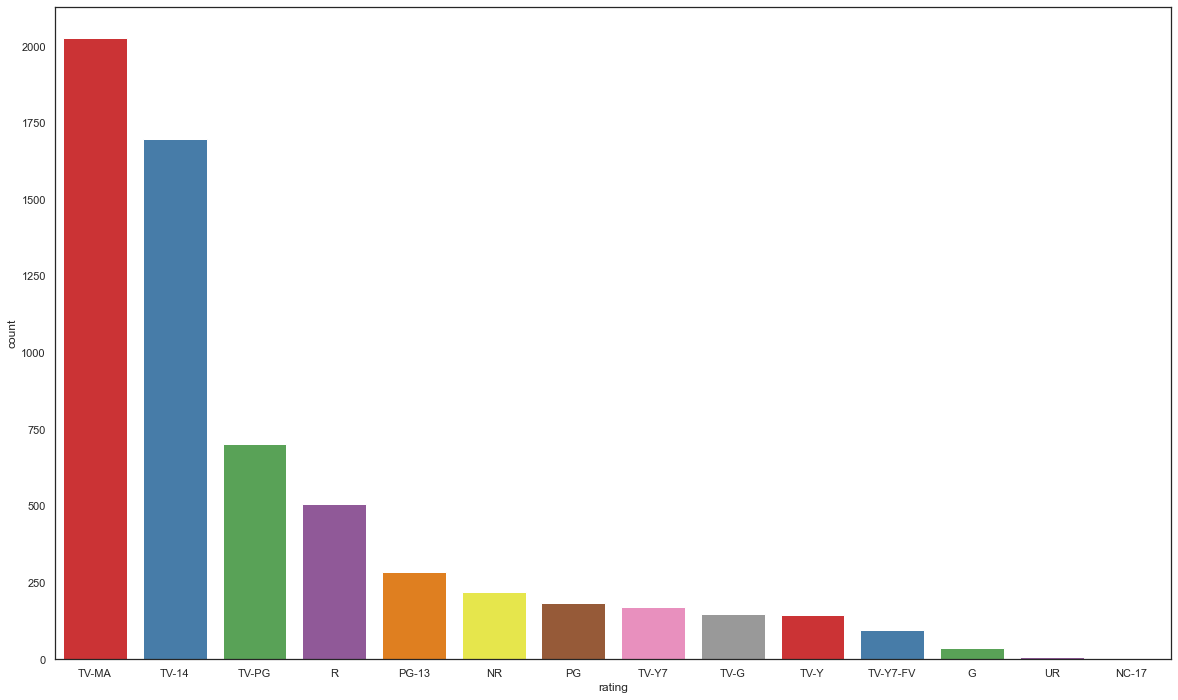

In [48]:
plt.figure(figsize=(20,12))
sns.set(style="white")
Plot=sns.countplot(x="rating", data=df, palette="Set1", order=df['rating'].value_counts().index[0:15])

In [22]:
df[['title', 'description']]

,title,description
0,Norm of the North: King Sized Adventure,Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,When a prison ship crash unleashes hundreds of...
4,#realityhigh,When nerdy high schooler Dani finally attracts...
...,...,...
6229,Red vs. Blue,"This parody of first-person shooter games, mil..."
6230,Maron,"Marc Maron stars as Marc Maron, who interviews..."
6231,Little Baby Bum: Nursery Rhyme Friends,Nursery rhymes and original music for children...
6232,A Young Doctor's Notebook and Other Stories,"Set during the Russian Revolution, this comic ..."


In [23]:
netflix=df.copy()

In [32]:
tfidf = TfidfVectorizer(stop_words='english')
netflix['description'] = netflix['description'].fillna('')

In [26]:
tfidf_matrix=tfidf.fit_transform(netflix['description'])

In [33]:
netflix['description']

0       Before planning an awesome wedding for his gra...
1       Jandino Asporaat riffs on the challenges of ra...
2       With the help of three human allies, the Autob...
3       When a prison ship crash unleashes hundreds of...
4       When nerdy high schooler Dani finally attracts...
                              ...                        
6229    This parody of first-person shooter games, mil...
6230    Marc Maron stars as Marc Maron, who interviews...
6231    Nursery rhymes and original music for children...
6232    Set during the Russian Revolution, this comic ...
6233    This hit sitcom follows the merry misadventure...
Name: description, Length: 6234, dtype: object

In [28]:
from sklearn.metrics.pairwise import linear_kernel

In [34]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [35]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
indices=pd.Series(netflix.index,index=netflix['title']).drop_duplicates()

In [37]:
indices

title
Norm of the North: King Sized Adventure           0
Jandino: Whatever it Takes                        1
Transformers Prime                                2
Transformers: Robots in Disguise                  3
#realityhigh                                      4
                                               ... 
Red vs. Blue                                   6229
Maron                                          6230
Little Baby Bum: Nursery Rhyme Friends         6231
A Young Doctor's Notebook and Other Stories    6232
Friends                                        6233
Length: 6234, dtype: int64

In [45]:
def get_recomm(title, cosine_sim=cosine_sim):
    indx=indices[title]
    sim_scores = list(enumerate(cosine_sim[indx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix[['title', 'description']].iloc[movie_indices]

In [46]:
get_recomm('Friends')

,title,description
5659,BoJack Horseman,Meet the most beloved sitcom horse of the '90s...
5987,Episodes,Hoping to create an American version of their ...
20,Manhattan Romance,A filmmaker working on a documentary about lov...
3923,Studio 54,This documentary follows the rapid rise and fa...
5830,Dad's Army,This beloved sitcom follows the unlikely heroe...
5843,Trailer Park Boys,Follow the booze-fueled misadventures of three...
4381,Single Ladies Senior,Four best friends and spirited career women na...
1524,Warehoused,A soon-to-be-retiring Mr. Lino teaches 20-some...
5445,"O-Negative, Love Cant Be Designed",Five schoolmates who share a blood type naviga...
2594,Life Story,This documentary series follows wild creatures...
